In [7]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [8]:
x=np.load('X.npy')
y=np.load('Y.npy')

In [9]:
x.shape

(2062, 64, 64)

In [16]:
y.shape

(2062, 10)

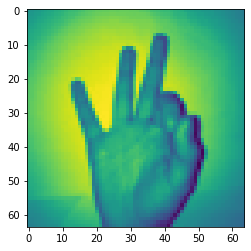

In [23]:
plt.imshow(x[100])
plt.show()

In [14]:
y[0]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [40]:
x[0]

array([[0.00183007, 0.00186082, 0.0018762 , ..., 0.00202999, 0.00201461,
        0.00196847],
       [0.00195309, 0.00190696, 0.00190696, ..., 0.00206075, 0.00202999,
        0.00199923],
       [0.00213764, 0.00193772, 0.00192234, ..., 0.00207612, 0.00206075,
        0.00201461],
       ...,
       [0.00196847, 0.00201461, 0.00202999, ..., 0.0021684 , 0.00213764,
        0.0020915 ],
       [0.00195309, 0.00198385, 0.00201461, ..., 0.00213764, 0.0020915 ,
        0.00204537],
       [0.00192234, 0.00195309, 0.00196847, ..., 0.00207612, 0.00204537,
        0.00199923]], dtype=float32)

In [24]:
#x=x/255   #normalization

In [41]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)

In [42]:
x_train.shape


(1649, 64, 64)

In [43]:
x_train=x_train.reshape(1649,64*64)       #converting 3d into 2d
x_test=x_test.reshape(413,64*64) 

In [44]:
x_train.shape

(1649, 4096)

In [45]:
nn=Sequential()
nn.add(Dense(units=512,activation='tanh',input_dim=4096))
nn.add(Dense(units=256,activation='tanh'))
nn.add(Dense(units=128,activation='tanh'))
nn.add(Dense(units=64,activation='tanh'))
nn.add(Dense(units=32,activation='tanh'))
nn.add(Dense(units=10,activation='softmax'))
nn.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [46]:
nn.fit(x_train,y_train,batch_size=32,epochs=100)

Epoch 1/100
52/52 [==============================] - 1s 14ms/step - loss: 2.3104 - accuracy: 0.1061
Epoch 2/100
52/52 [==============================] - 1s 14ms/step - loss: 2.1592 - accuracy: 0.2007
Epoch 3/100
52/52 [==============================] - 1s 14ms/step - loss: 1.7786 - accuracy: 0.3445
Epoch 4/100
52/52 [==============================] - 1s 14ms/step - loss: 1.6070 - accuracy: 0.4081
Epoch 5/100
52/52 [==============================] - 1s 14ms/step - loss: 1.3882 - accuracy: 0.5045
Epoch 6/100
52/52 [==============================] - 1s 14ms/step - loss: 1.2919 - accuracy: 0.5318
Epoch 7/100
52/52 [==============================] - 1s 14ms/step - loss: 1.2470 - accuracy: 0.5476
Epoch 8/100
52/52 [==============================] - 1s 15ms/step - loss: 1.2150 - accuracy: 0.5700
Epoch 9/100
52/52 [==============================] - 1s 16ms/step - loss: 1.2280 - accuracy: 0.5622
Epoch 10/100
52/52 [==============================] - 1s 14ms/step - loss: 1.1274 - accuracy: 0.6192

52/52 [==============================] - 1s 13ms/step - loss: 0.4008 - accuracy: 0.8587
Epoch 83/100
52/52 [==============================] - 1s 13ms/step - loss: 0.3471 - accuracy: 0.8745
Epoch 84/100
52/52 [==============================] - 1s 13ms/step - loss: 0.2427 - accuracy: 0.9169
Epoch 85/100
52/52 [==============================] - 1s 13ms/step - loss: 0.2555 - accuracy: 0.9102
Epoch 86/100
52/52 [==============================] - 1s 14ms/step - loss: 0.3267 - accuracy: 0.8842
Epoch 87/100
52/52 [==============================] - 1s 14ms/step - loss: 0.2428 - accuracy: 0.9133
Epoch 88/100
52/52 [==============================] - 1s 14ms/step - loss: 0.3588 - accuracy: 0.8727
Epoch 89/100
52/52 [==============================] - 1s 14ms/step - loss: 0.2392 - accuracy: 0.9224
Epoch 90/100
52/52 [==============================] - 1s 14ms/step - loss: 0.4248 - accuracy: 0.8563
Epoch 91/100
52/52 [==============================] - 1s 14ms/step - loss: 0.3270 - accuracy: 0.8842
Epo

In [47]:
nn.evaluate(x_test,y_test)

13/13 [==============================] - 0s 5ms/step - loss: 0.6192 - accuracy: 0.8281


[0.619159996509552, 0.8280871510505676]

In [ ]:
#prediction

In [49]:
nn.predict(x_test[0:3]).round(2)

1/1 [==============================] - 0s 24ms/step


array([[0.  , 0.  , 0.  , 0.99, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.02, 0.97, 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.96, 0.  , 0.  , 0.01, 0.03, 0.  ]],
      dtype=float32)

In [50]:
y_test[0:3]

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]])

In [51]:
np.argmax(nn.predict(x_test[0:3]).round(2),axis=1)

1/1 [==============================] - 0s 17ms/step


array([3, 6, 4], dtype=int64)

In [52]:
np.argmax(y_test[0:3],axis=1)

array([3, 6, 4], dtype=int64)

In [53]:
np.argmax(nn.predict(x_test[0:10]).round(2),axis=1)

1/1 [==============================] - 0s 26ms/step


array([3, 6, 4, 2, 8, 6, 2, 9, 3, 9], dtype=int64)

In [54]:
np.argmax(y_test[0:10],axis=1)

array([3, 6, 4, 2, 8, 6, 2, 9, 3, 9], dtype=int64)